#   Naive Forecast - Baseline Comparison (Previous Day's Same Hour)

In [1]:

import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Loading the preprocessed dataset

In [ ]:

df = pd.read_csv('data_nextday.csv')


# Shift the demand column to create the naive forecast (predicts the same value as the previous day's same hour)

In [ ]:

# Drop rows with NaN values (the first 24 rows will have NaN since there's no previous day data)
df = df.dropna(subset=['naive_forecast'])


# Split data into train and test sets (80% training, 20% testing)

In [ ]:

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


# Targeting variable for evaluation (next day's demand)

In [ ]:


y_test = test['demand_next_day']
y_naive_forecast = test['naive_forecast']

# Evaluating the naive forecast model using MAE, RMSE, and MAPE

In [ ]:

mae_naive = mean_absolute_error(y_test, y_naive_forecast)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_naive_forecast))
mape_naive = (abs(y_test - y_naive_forecast) / y_test).mean() * 100


# Output the evaluation metrics

In [ ]:

print(f'Naive Forecast - MAE: {mae_naive}')
print(f'Naive Forecast - RMSE: {rmse_naive}')
print(f'Naive Forecast - MAPE: {mape_naive}%')


Naive Forecast - MAE: 0.011569651978064756
Naive Forecast - RMSE: 0.01776497188141579
Naive Forecast - MAPE: 9.997515953755624%


# Visualize the naive forecast vs actual values

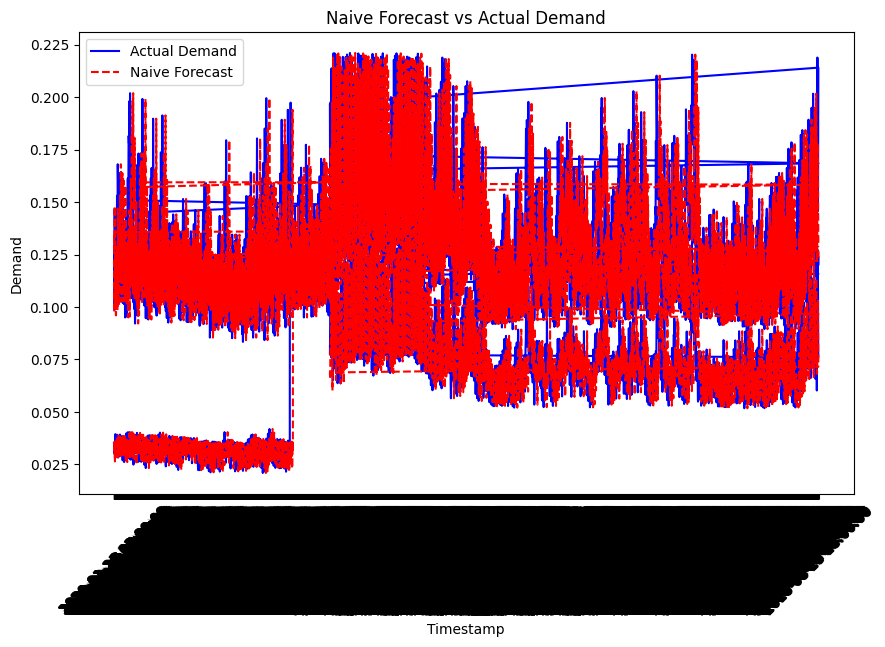

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test['Timestamp'], y_test, label='Actual Demand', color='blue')
plt.plot(test['Timestamp'], y_naive_forecast, label='Naive Forecast', color='red', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.title('Naive Forecast vs Actual Demand')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Selecting a subset of data for better clarity (e.g., last 7 days of data)

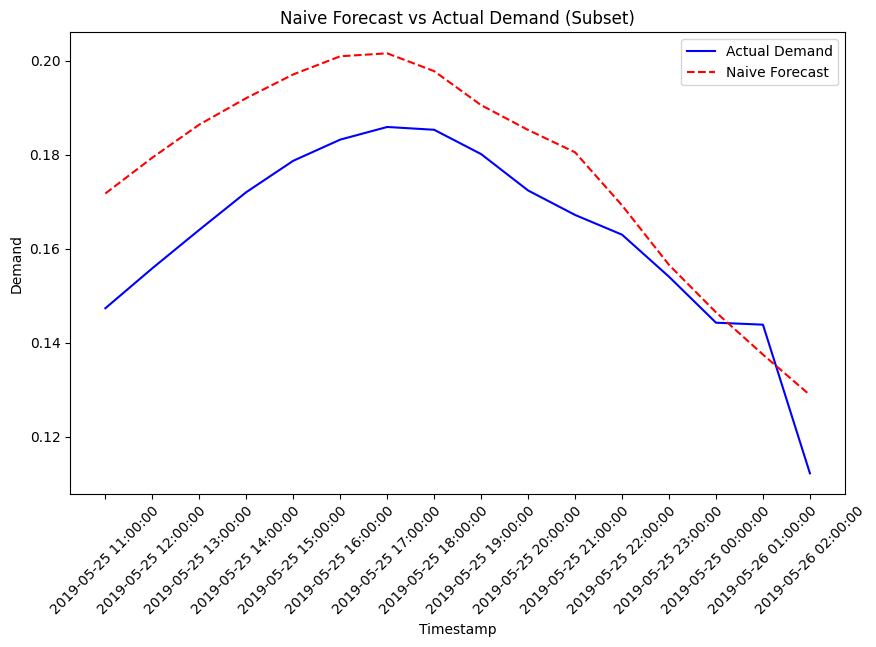

In [ ]:

subset_df = df.tail(16)  # 168 hours = 7 days of data

# Plot Actual vs Naive Forecast for the subset
plt.figure(figsize=(10, 6))
plt.plot(subset_df['Timestamp'], subset_df['demand_next_day'], label='Actual Demand', color='blue')
plt.plot(subset_df['Timestamp'], subset_df['naive_forecast'], label='Naive Forecast', color='red', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.title('Naive Forecast vs Actual Demand (Subset)')
plt.legend()
plt.xticks(rotation=45)
plt.show()